In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"herutriana","key":"2c1f797ca47ea0ac874fea831a498631"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wandadian/image-classification-botolgelastoples

 99% 635M/644M [00:04<00:00, 132MB/s]
100% 644M/644M [00:04<00:00, 146MB/s]


In [ ]:
import zipfile,os
zip_lcl = '/content/image-classification-botolgelastoples.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/content')
rzip.close()

In [ ]:
import os
import zipfile

def zip_directory(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, mode='w') as zipf:
        len_dir_path = len(folder_path)
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, file_path[len_dir_path:])

zip_directory('/content/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/VALIDATION', '/content/botol.zip')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

import warnings

warnings.filterwarnings('ignore')

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
CLASSES, gems = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('/content/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/TRAIN'):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc

    if len(files) > 0:
        gems.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name

    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0))

gems_count = len(CLASSES) # 87 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(gems)))

3 classes with 240 images in total


In [ ]:
BATCH_SIZE = 40
IMAGE_SIZE = 256
EPOCHS=62
CHANNELS=3
SPLIT = 0.3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/TRAIN",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 240 files belonging to 3 classes.


In [ ]:
label = dataset.class_names
label

['BOTOL', 'GELAS', 'TOPLES']

In [ ]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [ ]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [ ]:
img_w, img_h = 220, 220

In [ ]:
train_dir = "/content/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/TRAIN"
train_image,train_label = read_imgs_lbls(train_dir)
train_label = get_class_index(train_label)

In [ ]:
test_dir = "/content/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/TRAIN"
test_image,testLbl = read_imgs_lbls(test_dir)
test_label = get_class_index(testLbl)

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(40, 256, 256, 3)
tf.Tensor(
[[[132.58533   122.585335  113.585335 ]
  [131.0993    121.099304  112.099304 ]
  [133.43915   123.439156  114.439156 ]
  ...
  [162.71635   163.71635   157.71635  ]
  [160.76727   161.76727   155.76727  ]
  [161.42278   162.42278   156.42278  ]]

 [[128.29626   118.29627   109.29627  ]
  [135.90506   125.90506   116.90506  ]
  [136.87695   126.87695   117.87695  ]
  ...
  [161.59286   162.59286   156.59286  ]
  [157.75871   158.75871   152.75871  ]
  [158.99866   159.99866   153.99866  ]]

 [[138.61644   128.61644   119.61644  ]
  [140.91513   130.91513   121.91512  ]
  [136.70145   126.70145   117.70145  ]
  ...
  [149.82404   150.82404   144.82404  ]
  [151.02869   152.02869   146.02869  ]
  [150.03156   151.03156   145.03156  ]]

 ...

 [[ 53.24429    24.251953   15.719048 ]
  [ 54.26367    23.919922   12.491295 ]
  [ 64.681366   28.695034   14.17234  ]
  ...
  [ 48.568825   31.568825   23.568825 ]
  [ 46.32182    29.32182    21.32182  ]
  [ 45.11914   

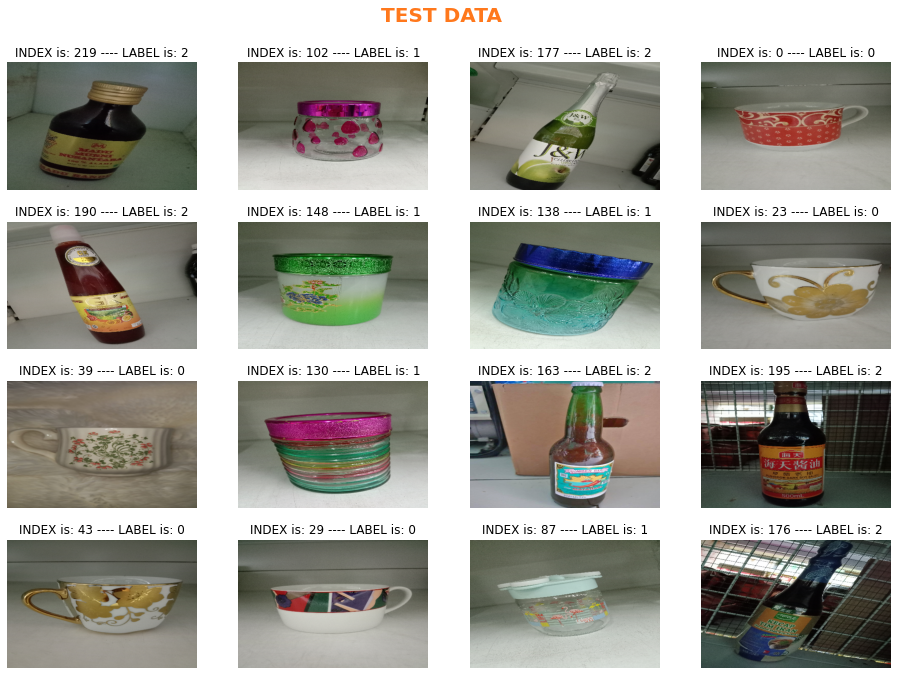

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(13,9))
fig.tight_layout()
plt.suptitle("TEST DATA\n\n\n\n", size = 20, va = 'center', color = '#ff781c', fontweight='bold')

for i in range(4):
    for j in range(4):

        # Select random number b/w 0 and length of test_image
        rand_num = np.random.randint(0, len(test_image) + 1)
        img = test_image[rand_num]      # image at specific index
        label = test_label[rand_num]    # label number of image

        axes[i][j].imshow(img, aspect='auto')
        axes[i][j].set_title(f"INDEX is: {rand_num} ---- LABEL is: {label}")
        axes[i][j].axis('off')

In [ ]:
train_label = train_label.reshape(train_label.shape[0])
test_label = test_label.reshape(test_label.shape[0])

In [ ]:
classes = ["Botol","Gelas","Toples"]

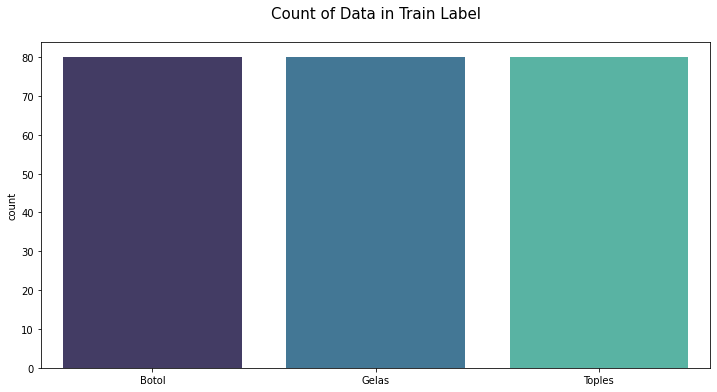

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Count of Data in Train Label\n", size = 15)

sns.countplot(x = train_label, palette='mako').set(xticklabels = classes);

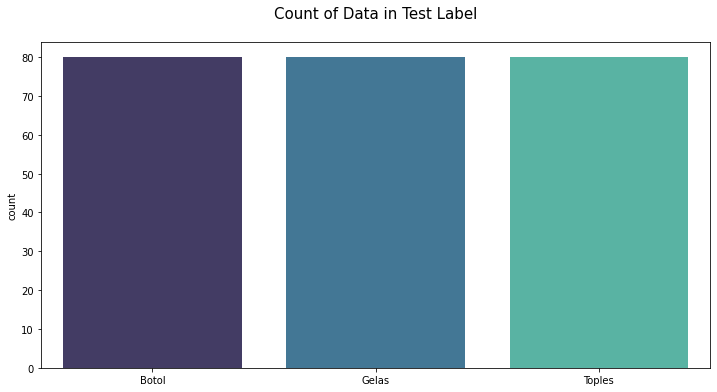

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Count of Data in Test Label\n", size = 15)

sns.countplot(x = test_label, palette='mako').set(xticklabels = classes);

In [ ]:
print(f"Maximum value in train_images is: {train_image.max()}")
print(f"Minimum value in train_images is: {train_image.min()}\n")

print(f"Maximum value in test_images is: {test_image.max()}")
print(f"Minimum value in test_images is: {test_image.min()}")

Maximum value in train_images is: 255
Minimum value in train_images is: 0

Maximum value in test_images is: 255
Minimum value in test_images is: 0


In [ ]:
train_image = train_image.astype('float64') / 255.0
test_image = test_image.astype('float64') / 255.0

In [ ]:
print(f"Maximum value in train_images is: {train_image.max()}")
print(f"Minimum value in train_images is: {train_image.min()}\n")

print(f"Maximum value in test_images is: {test_image.max()}")
print(f"Minimum value in test_images is: {test_image.min()}")

Maximum value in train_images is: 1.0
Minimum value in train_images is: 0.0

Maximum value in test_images is: 1.0
Minimum value in test_images is: 0.0


In [ ]:
#print(train_label)
#print(test_label)

In [ ]:
train_label = to_categorical(train_label, num_classes = 3)
test_label = to_categorical(test_label, num_classes = 3)

In [ ]:
#print(train_label)
#print(test_label)

In [ ]:
input_shape = train_image.shape[1:]
num_classes = 10

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
model = Sequential()
#model.add(data_augmentation)
model.add(Conv2D(filters = 128, kernel_size = 2,activation = "relu", input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 32, kernel_size = 2, activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 2, activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation = "relu"))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 329, 329, 128)     1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 164, 164, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 163, 163, 32)      16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 81, 81, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 81, 81, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 64)       

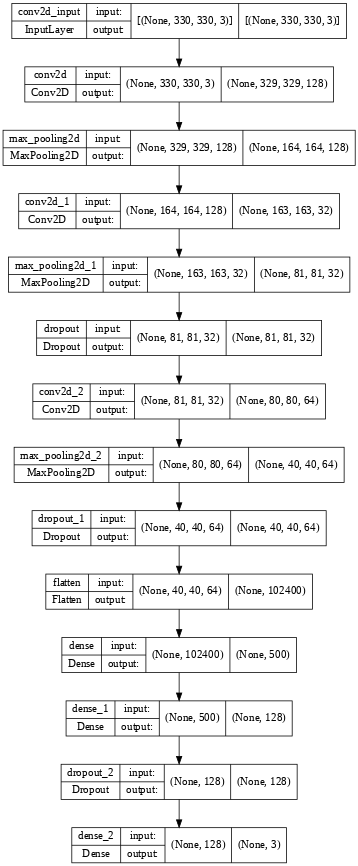

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

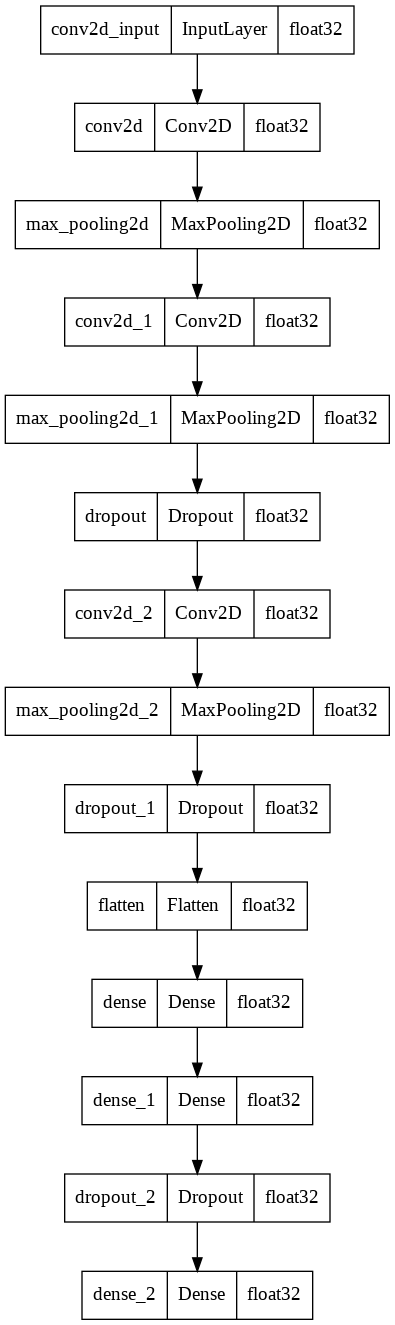

In [ ]:
plot_model(model, show_dtype = True, show_layer_names = True)

In [ ]:
run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
LR = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
result = model.fit(train_image, train_label,
                   validation_split = SPLIT,
                   epochs = EPOCHS,
                   batch_size = BATCH_SIZE,
                   callbacks = [cekmodel])

Epoch 1/62
5/5 [==============================] - ETA: 0s - loss: 4.2190 - accuracy: 0.5060 
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to model.hdf5
5/5 [==============================] - 62s 11s/step - loss: 4.2190 - accuracy: 0.5060 - val_loss: 2.9526 - val_accuracy: 0.0000e+00
Epoch 2/62
5/5 [==============================] - ETA: 0s - loss: 1.2334 - accuracy: 0.5833 
Epoch 2: val_accuracy did not improve from 0.00000
5/5 [==============================] - 55s 10s/step - loss: 1.2334 - accuracy: 0.5833 - val_loss: 1.4948 - val_accuracy: 0.0000e+00
Epoch 3/62
5/5 [==============================] - ETA: 0s - loss: 0.7975 - accuracy: 0.5952 
Epoch 3: val_accuracy did not improve from 0.00000
5/5 [==============================] - 51s 10s/step - loss: 0.7975 - accuracy: 0.5952 - val_loss: 1.9366 - val_accuracy: 0.0000e+00
Epoch 4/62
5/5 [==============================] - ETA: 0s - loss: 0.7733 - accuracy: 0.5714 
Epoch 4: val_accuracy did not improve from 0.00000

In [ ]:
train_loss = result.history['loss']
train_acc = result.history['accuracy']
val_loss = result.history['val_loss']
val_acc = result.history['val_accuracy']

In [ ]:
pd.DataFrame({"Training Loss" : train_loss,
             "Validation Loss": val_loss,
             "Train Accuracy" : train_acc,
             "Validation Accuracy" : val_acc}).style.bar(color='#ff781c')

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy
0,4.219022,2.952588,0.505952,0.000000
1,1.233409,1.494761,0.583333,0.000000
2,0.797481,1.936636,0.595238,0.000000
3,0.773343,1.575716,0.571429,0.000000
4,0.609339,1.605234,0.654762,0.388889
5,0.591952,1.070094,0.732143,0.597222
6,0.438704,1.164901,0.803571,0.597222
7,0.411464,0.841231,0.833333,0.666667
8,0.246635,0.980006,0.910714,0.625000
9,0.199986,1.191507,0.934524,0.652778


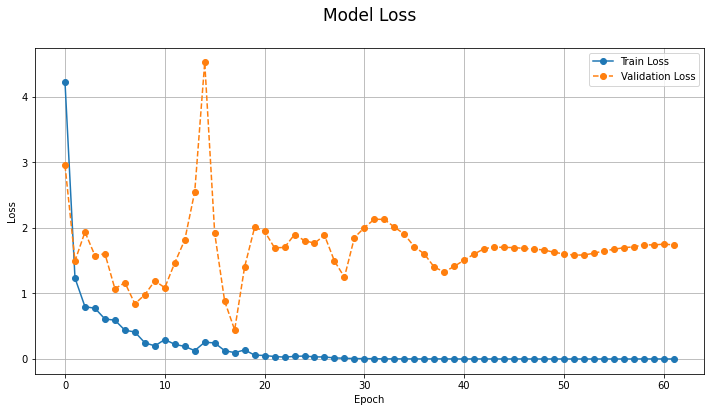

In [ ]:
plt.figure(figsize = (12,6))

plt.title("Model Loss\n", size = 17)
plt.plot(train_loss, label = "Train Loss", marker = 'o')
plt.plot(val_loss, label='Validation Loss', linestyle='--', marker='o')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend();

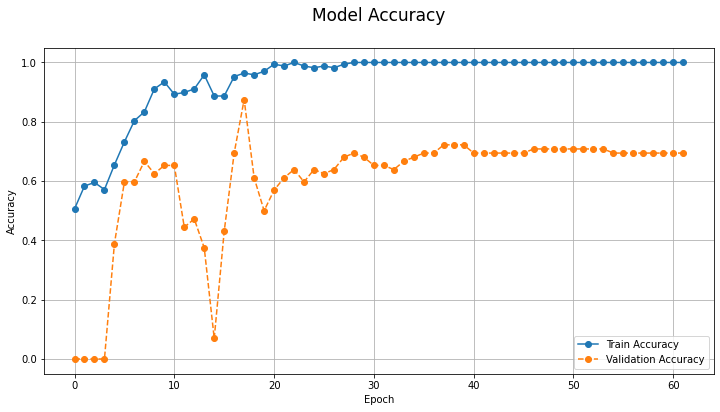

In [ ]:
plt.figure(figsize = (12,6))

plt.title("Model Accuracy\n", size = 17)
plt.plot(train_acc, label = "Train Accuracy", marker = 'o')
plt.plot(val_acc, label='Validation Accuracy', linestyle='--', marker='o')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend();

In [ ]:
test_loss , test_acc = model.evaluate(test_image , test_label)

8/8 [==============================] - 15s 2s/step - loss: 0.5481 - accuracy: 0.9000


In [ ]:
print(f'Loss on test data is: {test_loss}')
print(f"Accuracy on test data is: {test_acc}")

Loss on test data is: 0.5481415390968323
Accuracy on test data is: 0.8999999761581421


In [ ]:
img_15 = np.expand_dims(test_image[15], axis = 0)

pred_1 = model.predict(img_15)
pred_1

array([[9.9958044e-01, 4.0697341e-04, 1.2588723e-05]], dtype=float32)

In [ ]:
pred_1.max()

0.99958044

In [ ]:
pred_1.argmax()

0

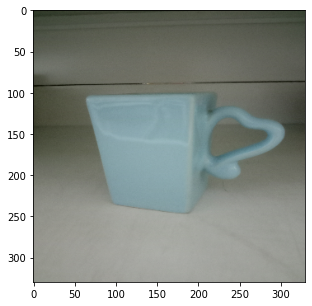

In [ ]:
plt.figure(figsize = (10,5))

plt.imshow(test_image[15]);

In [ ]:
all_prediction = model.predict(test_image)

In [ ]:
predicted_labels = [np.argmax(pred) for pred in all_prediction]

In [ ]:
test_label = [np.argmax(i) for i in test_label]

In [ ]:
predicted_labels[:20]            # displaying first 20 predicted labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
test_label[:20]               # displaying first 20 actual labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# creating confusion matrix

cm = confusion_matrix(labels = test_label, predictions = predicted_labels)

In [ ]:
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[80,  0,  0],
       [ 2, 78,  0],
       [13,  9, 58]], dtype=int32)>

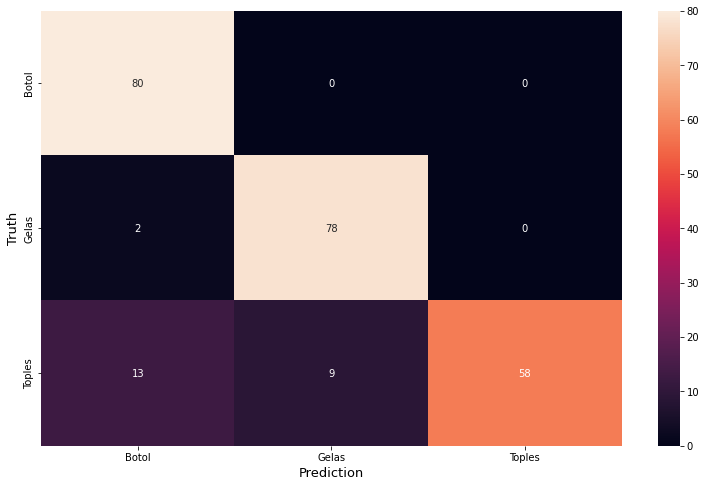

In [ ]:
#  Visualizing using seaborn

plt.figure(figsize = (13,8))
sns.heatmap(cm, annot = True, fmt = 'd').set(xticklabels = classes, yticklabels = classes)
plt.xlabel("Prediction", size = 13)
plt.ylabel("Truth",  size = 13)
plt.show()

In [ ]:
print(classification_report(test_label, predicted_labels))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        80
           1       0.90      0.97      0.93        80
           2       1.00      0.72      0.84        80

    accuracy                           0.90       240
   macro avg       0.91      0.90      0.90       240
weighted avg       0.91      0.90      0.90       240



In [ ]:
model.save('model.hdf5')